In [1]:
import numpy as np
import pandas as pd

# 1.Series对象
## 1.4 特殊的Series 时间序列 Time Series
时间序列的index是时间戳

### 创建时间序列：需要将index设置为Timestamp

    pd.Timestamp(对象)
    将类似于日期时间的对象（比如datatime，或者日期时间字符串）转换为时间戳

In [2]:
from datetime import datetime

In [3]:
date1 = datetime(2022, 11, 24)

In [4]:
date1

datetime.datetime(2022, 11, 24, 0, 0)

In [5]:
type(date1)

datetime.datetime

In [6]:
date_s = pd.Timestamp(date1)

In [7]:
date_s

Timestamp('2022-11-24 00:00:00')

In [8]:
ts1 = pd.Series(1, index = [date_s])

In [9]:
ts1

2022-11-24    1
dtype: int64

In [10]:
ts1.index

DatetimeIndex(['2022-11-24'], dtype='datetime64[ns]', freq=None)

In [11]:
s1 = pd.Series(np.arange(8), index = list('abcdefgh'))

In [12]:
s1

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
dtype: int32

In [13]:
s1.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [14]:
s2 = pd.Series(np.arange(10))

In [15]:
s2

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [16]:
s2.index

RangeIndex(start=0, stop=10, step=1)

Timestamp不支持序列对象，处理较大的数据集会很麻烦，因此，更常用的的方式是通过pd.to_datetime将其他对象转换为DatetimeIndex

    pd.to_datetime(obj)
    obj是用来转换为DatetimeIndex的对象，常用日期时间对象或日期时间字符串序列

In [17]:
dates = ['2022-11-21','2022-11-22','2022-11-23','2022-11-24','2022-11-25','2022-11-26','2022-11-27']

In [18]:
ts2 = pd.Series(
    np.random.randint(1,101,7),
    index = pd.to_datetime(dates)
)

In [19]:
ts2

2022-11-21     15
2022-11-22      8
2022-11-23     55
2022-11-24     53
2022-11-25     58
2022-11-26    100
2022-11-27     64
dtype: int32

In [20]:
ts2.index

DatetimeIndex(['2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27'],
              dtype='datetime64[ns]', freq=None)

如何创建更长的时间序列

    pd.date_range(
        start=None,                               # 起始时间 
        end=None,                                # 结束时间
        periods=None,                              # 持续时间
        freq=None,                                # 时间频率，默认是D天
        tz=None,
        normalize: 'bool' = False,
        name: 'Hashable' = None,
        closed: 'str | None | lib.NoDefault' = <no_default>,
        inclusive: 'str | None' = None,
        **kwargs,
    ) -> 'DatetimeIndex'

In [21]:
# 创建从2020年1月1日开始，有1000个元素的时间序列
long_ts = pd.Series(
    np.random.rand(1000),
    index = pd.date_range('2020/1/1', periods = 1000)
)

In [22]:
long_ts

2020-01-01    0.585773
2020-01-02    0.967580
2020-01-03    0.854190
2020-01-04    0.293889
2020-01-05    0.449730
                ...   
2022-09-22    0.968902
2022-09-23    0.053698
2022-09-24    0.131429
2022-09-25    0.328146
2022-09-26    0.792414
Freq: D, Length: 1000, dtype: float64

### 访问时间序列中的数据
除了使用传统的Series的索引切片方法进行时间序列数据访问之外，时间序列的最大特点是可以使用时间作为索引进行访问，甚至可以自动识别类似日期时间的对象（字符串）

In [23]:
long_ts[0]

C:\Users\hechang\AppData\Local\Temp\ipykernel_27276\976543583.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  long_ts[0]


0.5857732928721451

In [24]:
long_ts['2020-1-2']

0.9675802516415527

In [25]:
long_ts['2020/1/2']

0.9675802516415527

In [26]:
long_ts['20200102']

0.9675802516415527

通过时间单位进行截取

In [27]:
# 提取某年的数据
long_ts['2020']

2020-01-01    0.585773
2020-01-02    0.967580
2020-01-03    0.854190
2020-01-04    0.293889
2020-01-05    0.449730
                ...   
2020-12-27    0.439233
2020-12-28    0.447649
2020-12-29    0.875848
2020-12-30    0.248814
2020-12-31    0.679356
Freq: D, Length: 366, dtype: float64

<Axes: >

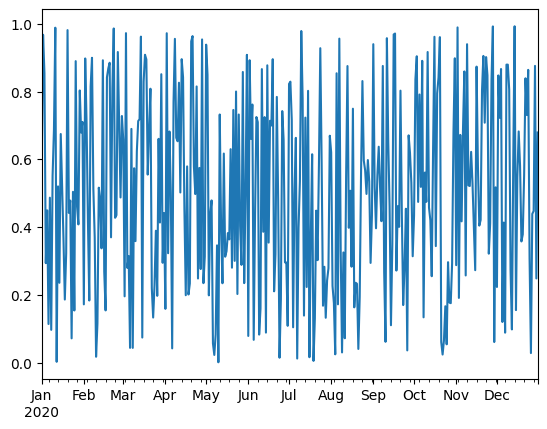

In [28]:
long_ts['2020'].plot()

In [29]:
# 2021年11月数据
long_ts['2021-11']

2021-11-01    0.370056
2021-11-02    0.576400
2021-11-03    0.020234
2021-11-04    0.708104
2021-11-05    0.434913
2021-11-06    0.781043
2021-11-07    0.095334
2021-11-08    0.772542
2021-11-09    0.081849
2021-11-10    0.964977
2021-11-11    0.920702
2021-11-12    0.007728
2021-11-13    0.141823
2021-11-14    0.739743
2021-11-15    0.683213
2021-11-16    0.524369
2021-11-17    0.702087
2021-11-18    0.123043
2021-11-19    0.648061
2021-11-20    0.839274
2021-11-21    0.564419
2021-11-22    0.604292
2021-11-23    0.702756
2021-11-24    0.182646
2021-11-25    0.800305
2021-11-26    0.231693
2021-11-27    0.872127
2021-11-28    0.046685
2021-11-29    0.357545
2021-11-30    0.667632
Freq: D, dtype: float64

In [30]:
# 基于时间的切片
long_ts['2022-05':'2022-06']

2022-05-01    0.882647
2022-05-02    0.009055
2022-05-03    0.320671
2022-05-04    0.855547
2022-05-05    0.471152
                ...   
2022-06-26    0.834384
2022-06-27    0.650583
2022-06-28    0.781395
2022-06-29    0.624306
2022-06-30    0.290390
Freq: D, Length: 61, dtype: float64

In [31]:
# 所有4月份的数据
long_ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [32]:
dir(long_ts.index)

['T',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',

In [33]:
long_ts[long_ts.index.month == 4]

2020-04-01    0.159054
2020-04-02    0.972115
2020-04-03    0.323142
2020-04-04    0.682267
2020-04-05    0.501350
                ...   
2022-04-26    0.481520
2022-04-27    0.448512
2022-04-28    0.492597
2022-04-29    0.642174
2022-04-30    0.908113
Length: 90, dtype: float64

In [34]:
long_ts[long_ts.index.weekday == 4].mean()

0.5268990834655558

截取某个时间点之前/之后的数据

In [35]:
# 提取2021年之后的数据
long_ts.truncate(before = '2022-01-01')
# 过滤到2022年1月1日之前的数据

2022-01-01    0.879344
2022-01-02    0.414919
2022-01-03    0.255679
2022-01-04    0.043010
2022-01-05    0.911578
                ...   
2022-09-22    0.968902
2022-09-23    0.053698
2022-09-24    0.131429
2022-09-25    0.328146
2022-09-26    0.792414
Freq: D, Length: 269, dtype: float64

In [36]:
# 2022年之前的数据
long_ts.truncate(after ='2021/12/31')

2020-01-01    0.585773
2020-01-02    0.967580
2020-01-03    0.854190
2020-01-04    0.293889
2020-01-05    0.449730
                ...   
2021-12-27    0.608600
2021-12-28    0.466849
2021-12-29    0.009553
2021-12-30    0.067058
2021-12-31    0.137784
Freq: D, Length: 731, dtype: float64

### 时间序列的超前/滞后操作
    超前滞后是指将时间序列的数据平移指定的时间单位，滞后是将数据朝后平移，超前是向前平移
    ts.shift(n)
    n > 0 滞后
    n < 0 超前

In [37]:
# 构建一组股票数据
ts_stock = pd.Series(
    np.random.randint(80, 160, 7) / 10,
    index = pd.date_range('2022/11/20', periods = 7)
)

In [38]:
ts_stock

2022-11-20    14.0
2022-11-21    14.5
2022-11-22    11.4
2022-11-23    15.5
2022-11-24    12.8
2022-11-25     8.6
2022-11-26    10.0
Freq: D, dtype: float64

In [39]:
# 滞后一期
ts_stock.shift(1)

2022-11-20     NaN
2022-11-21    14.0
2022-11-22    14.5
2022-11-23    11.4
2022-11-24    15.5
2022-11-25    12.8
2022-11-26     8.6
Freq: D, dtype: float64

In [40]:
# 超前
ts_stock.shift(-1)

2022-11-20    14.5
2022-11-21    11.4
2022-11-22    15.5
2022-11-23    12.8
2022-11-24     8.6
2022-11-25    10.0
2022-11-26     NaN
Freq: D, dtype: float64

收益率 = 涨跌情况 / 前一天的数据 = (原始数据 - 滞后一期的数据) / 滞后一期的数据

In [41]:
(ts_stock - ts_stock.shift(1)) / ts_stock.shift(1)

2022-11-20         NaN
2022-11-21    0.035714
2022-11-22   -0.213793
2022-11-23    0.359649
2022-11-24   -0.174194
2022-11-25   -0.328125
2022-11-26    0.162791
Freq: D, dtype: float64

In [42]:
# 传统方法
diff_stock = np.diff(ts_stock)

In [43]:
diff_stock

array([ 0.5, -3.1,  4.1, -2.7, -4.2,  1.4])

In [44]:
diff_stock / ts_stock[:-1]

2022-11-20    0.035714
2022-11-21   -0.213793
2022-11-22    0.359649
2022-11-23   -0.174194
2022-11-24   -0.328125
2022-11-25    0.162791
Freq: D, dtype: float64

# 2 DataFrame对象
## 2.1 DataFrame简介
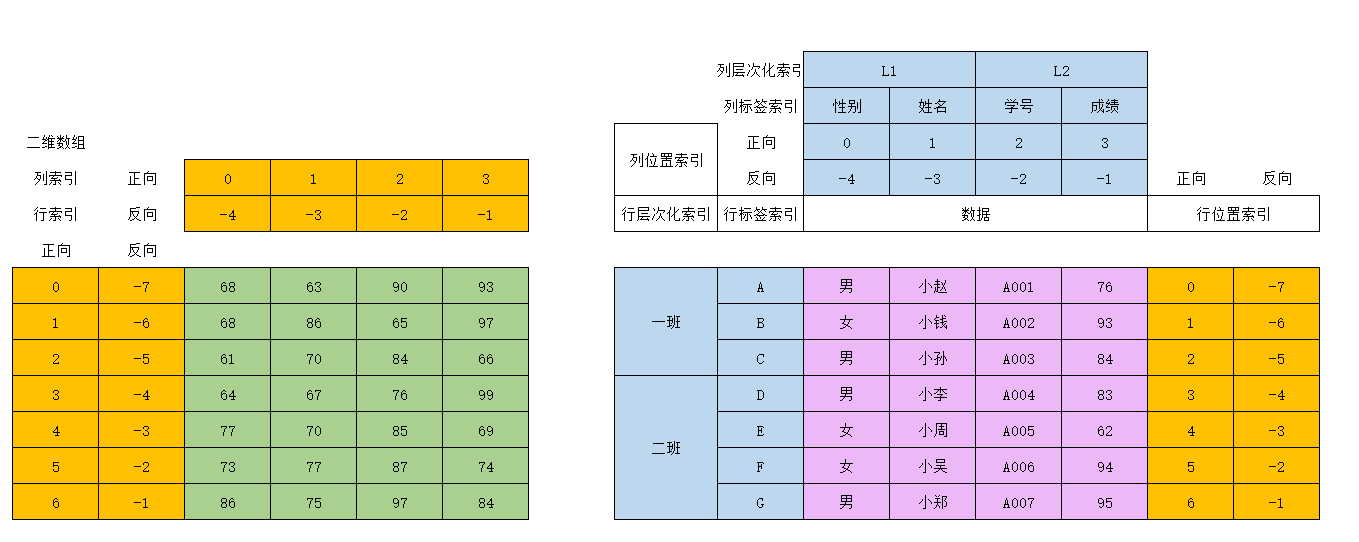

DataFrame可以视为多个共享index的Series的集合，为了方便对不同的Series进行区分，引入columns

## 2.2 创建DataFrame

    pd.DataFrame(
        data=None,                  # 数据，可以使用列表/字典/Series/DataFrame/数组......
        index: 'Axes | None' = None,      # 行索引，不指定直接使用位置索引
        columns: 'Axes | None' = None,     # 列索引
        dtype: 'Dtype | None' = None,
        copy: 'bool | None' = None,
    )

### 创建只有值的DataFrame

In [45]:
df1 = pd.DataFrame(np.arange(1,13).reshape((3,4)))
# 将二维数组转换为DataFrame

In [46]:
df1

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [47]:
df2 = pd.DataFrame(np.random.randint(1, 10, 10))

In [48]:
df2

,0
0,2
1,2
2,9
3,1
4,1
5,9
6,9
7,7
8,9
9,9


In [49]:
type(df2)

pandas.core.frame.DataFrame

In [50]:
s3 = pd.Series(np.random.randint(1,10,10))

In [51]:
s3

0    7
1    9
2    6
3    3
4    5
5    5
6    1
7    2
8    4
9    9
dtype: int32

### 创建带有columns的DataFrame

In [52]:
# 创建一个嵌套的字典
df_dict = {
    'city': ['北京', '上海', '广州', '深圳'],
    'price' : (120000,101000,98000, 76000),
    'year' : np.array([2018,2019,2020,2021])
    
}

In [53]:
df_dict

{'city': ['北京', '上海', '广州', '深圳'],
 'price': (120000, 101000, 98000, 76000),
 'year': array([2018, 2019, 2020, 2021])}

In [54]:
df3 = pd.DataFrame(df_dict)
# 将字典转换为DataFrame时，字典的键成为columns,字典的值成为values
# DataFrame的操作是列优先的

In [55]:
df3

,city,price,year
0,北京,120000,2018
1,上海,101000,2019
2,广州,98000,2020
3,深圳,76000,2021


### 创建既有index，又有columns的DataFrame

In [56]:
df4 = pd.DataFrame(
    df_dict,
    index = list('ABCD'),
    columns = ['year','city','price']
)
# 使用字典创建带有columns的DataFrame时，columns的内容是从字典的键中获取的，但顺序不一定和字典的顺序一致

In [57]:
df4

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [58]:
df4x = pd.DataFrame(
    df_dict,
    index = list('ABCD'),
    columns = ['year','city','prece']
)
# 如果columns不在字典的键中，则该列会引入Nan(缺失值)
# 字典中没有被columns引用的数据不会出现在DataFrame中

In [59]:
df4x

,year,city,prece
A,2018,北京,NaN
B,2019,上海,NaN
C,2020,广州,NaN
D,2021,深圳,NaN


In [60]:
df5 = pd.DataFrame(
    np.arange(1,13).reshape(3,4),
    index = list('abc'),
    columns = list('ABCD')
)

In [61]:
df5

,A,B,C,D
a,1,2,3,4
b,5,6,7,8
c,9,10,11,12


## 2.3 访问DataFrame及其中的元素
### DataFrame中的对象
    index : 行索引
    columns : 列索引
    values : 值

In [62]:
df4.index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [63]:
df4.columns
# columns也是Index对象

Index(['year', 'city', 'price'], dtype='object')

In [64]:
type(df4.index)

pandas.core.indexes.base.Index

In [65]:
type(df4.columns)

pandas.core.indexes.base.Index

In [66]:
df4.values
# DataFrame的values是一个二维数组
# 因为DataFrame的每一列的数据类型不一定一致
# 因此DataFrame的values是一个特殊类型的二维数组

array([[2018, '北京', 120000],
       [2019, '上海', 101000],
       [2020, '广州', 98000],
       [2021, '深圳', 76000]], dtype=object)

In [67]:
df4.values.shape

(4, 3)

In [68]:
df4.values.dtype

dtype('O')

### 访问DataFrame中的部分数据（按行进行访问）

    df.head(n) : 前n行
    df.tail(n) : 后n行
    df.take([索引的序列]) : 返回指定索引的行

In [69]:
df4

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [70]:
df4.head(2)

,year,city,price
A,2018,北京,120000
B,2019,上海,101000


In [71]:
df4.tail(3)

,year,city,price
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [72]:
df4.take([2,1,3])

,year,city,price
C,2020,广州,98000
B,2019,上海,101000
D,2021,深圳,76000


### 两个非常重要的用来观察数据集整体的方法 describe / info

    DataFrame/Series.describe() : 观察数据集中所有列（如果是Series则是当前列）的描述性统计分析结果（返回常用的统计量）
    DataFrame/Series.info() : 观察数据集的整体情况：行、列的数量、各列的情况（数据类型、缺失情况等）

In [73]:
df4

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [74]:
df4.describe()
# 不带参数，返回的是数据集中的数值型（连续变量）的描述性统计分析结果
# mean±std, Q2(Q1, Q3), min/max/count

,year,price
count,4.000000,4.000000
mean,2019.500000,98750.000000
std,1.290994,18025.444978
min,2018.000000,76000.000000
25%,2018.750000,92500.000000
50%,2019.500000,99500.000000
75%,2020.250000,105750.000000
max,2021.000000,120000.000000


In [75]:
df4.describe(include = 'all')
# 针对所有列（包括非数值型 分类变量）进行描述性统计分析
# unique : 该列中不重复的类别数量
# top : 该列中出现次数最多的类别
# freq : 该列中出现次数最多的类别出现了多少次

,year,city,price
count,4.000000,4,4.000000
unique,NaN,4,NaN
top,NaN,北京,NaN
freq,NaN,1,NaN
mean,2019.500000,NaN,98750.000000
std,1.290994,NaN,18025.444978
min,2018.000000,NaN,76000.000000
25%,2018.750000,NaN,92500.000000
50%,2019.500000,NaN,99500.000000
75%,2020.250000,NaN,105750.000000


In [76]:
s3

0    7
1    9
2    6
3    3
4    5
5    5
6    1
7    2
8    4
9    9
dtype: int32

In [77]:
s3.describe()
# 在Series上进行describe，是针对当前列做描述性统计分析，返回的结果也是Series

count    10.000000
mean      5.100000
std       2.726414
min       1.000000
25%       3.250000
50%       5.000000
75%       6.750000
max       9.000000
dtype: float64

In [78]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    4 non-null      int32 
 1   city    4 non-null      object
 2   price   4 non-null      int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 112.0+ bytes


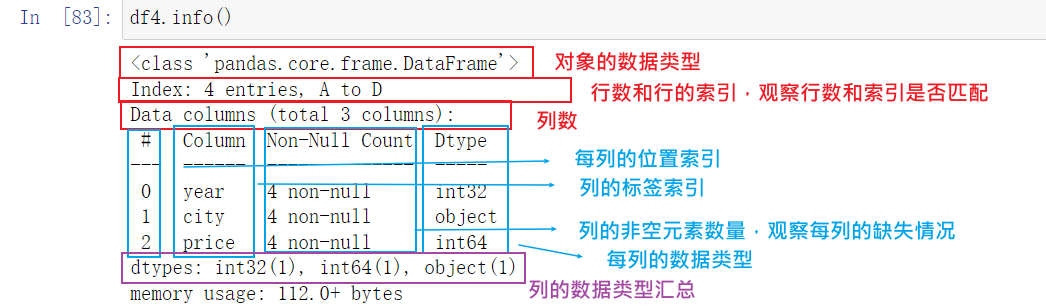

In [79]:
s3.info()
# 新版的pandas中增加

<class 'pandas.core.series.Series'>
RangeIndex: 10 entries, 0 to 9
Series name: None
Non-Null Count  Dtype
--------------  -----
10 non-null     int32
dtypes: int32(1)
memory usage: 172.0 bytes


### 利用索引和切片访问DataFrame中的元素

    访问列
    df[列名称]  # 读取一列（建议使用）
    df.列名称   # 读取一列，列名称必须是有效的变量名，而且不能和已有的属性/关键字冲突，面向对象的访问方法
    df[[列名称1,列名称2,...]] # 读取多列，花式索引
    
    访问行
    df.loc[标签索引]
    df.iloc[位置索引]
    
    # 访问单元格
    df.loc/iloc[行，列]
    
    切片
    df.loc/iloc[行1：行n]  # 行上切片
    df.loc/iloc[:, 列1: 列n] # 列上切片

In [80]:
df4

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [81]:
df4['city']
# 访问单列，返回Series

A    北京
B    上海
C    广州
D    深圳
Name: city, dtype: object

In [82]:
type(df4['city'])

pandas.core.series.Series

In [83]:
# df4['city', 'price']
# 访问多列一定要写在序列中

In [84]:
df4[['city', 'price']]
# 访问多列，返回DataFrame

,city,price
A,北京,120000
B,上海,101000
C,广州,98000
D,深圳,76000


In [85]:
df4[['city']]
# 访问单列，放在列表中，返回DataFrame

,city
A,北京
B,上海
C,广州
D,深圳


In [86]:
df4.city
# 返回单列，结果是Series

A    北京
B    上海
C    广州
D    深圳
Name: city, dtype: object

In [87]:
df4

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [88]:
# df4['A']
# 该方法只能用于访问列，不能用于访问行

In [89]:
df4.loc['A']
# 返回单行，结果是Series

year       2018
city         北京
price    120000
Name: A, dtype: object

In [90]:
df4.loc[['A']]
# 返回单行，结果是DataFrame

,year,city,price
A,2018,北京,120000


In [91]:
df4.iloc[1]

year       2019
city         上海
price    101000
Name: B, dtype: object

In [92]:
df4.iloc[[2,1,3]]
# 花式索引返回多行

,year,city,price
C,2020,广州,98000
B,2019,上海,101000
D,2021,深圳,76000


In [93]:
df4

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [94]:
# 返回“深圳”
df4.city['D']
# 先列后行

'深圳'

In [95]:
df4.loc['D']['city']
# 先行后列，类似嵌套容器的多层索引

'深圳'

In [96]:
df4.loc['D', 'city']
# 类似Numpy的多维索引

'深圳'

In [97]:
# df4.loc['city', 'D']
# loc/iloc是行序优先，注意索引的位置

In [98]:
df4.iloc[3, 1]

'深圳'

In [99]:
df4.values

array([[2018, '北京', 120000],
       [2019, '上海', 101000],
       [2020, '广州', 98000],
       [2021, '深圳', 76000]], dtype=object)

In [100]:
df4.values[3,1]

'深圳'

In [101]:
df4.loc['A':'D']
# 标签切片，闭区间

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [102]:
df4.iloc[0:2]
# 位置切片，左闭右开

,year,city,price
A,2018,北京,120000
B,2019,上海,101000


In [103]:
df4[0:2]
# 切片时是行序优先

,year,city,price
A,2018,北京,120000
B,2019,上海,101000


In [104]:
df4["A":"D"]

,year,city,price
A,2018,北京,120000
B,2019,上海,101000
C,2020,广州,98000
D,2021,深圳,76000


In [105]:
df4['year' : 'city']
# 直接切片无法返回列的内容

,year,city,price


In [106]:
# df4[:, 'year':'city']
# 对列切片用loc/iloc辅助

In [107]:
df4.loc[:, 'city':'price']

,city,price
A,北京,120000
B,上海,101000
C,广州,98000
D,深圳,76000


In [108]:
df4.iloc[:, 1:3]

,city,price
A,北京,120000
B,上海,101000
C,广州,98000
D,深圳,76000


In [109]:
#行和列同时进行
df4.iloc[1:3, 2:]

,price
B,101000
C,98000


In [110]:
df4.price < 100000

A    False
B    False
C     True
D     True
Name: price, dtype: bool

In [111]:
df4[df4.price < 100000]
# 返回的是数据集中符合条件的记录

,year,city,price
C,2020,广州,98000
D,2021,深圳,76000


In [112]:
df4['price'][df4.price <100000]

C    98000
D    76000
Name: price, dtype: int64

## 2.4 在DataFrame中修改和增加数据

    列：
    df[列名称] = xxx
    如果该列存在，就是修改DataFrame的内容，如果不存在，就是增加新的列
    xxx 可以是数字、字符串、数组、列表
    也可以是Series，但要注意索引的匹配问题
    如果只是修改，可以使用.语法
    df.列名称 = xxx
    .语法只能用于访问和修改
    
    行：
    df.loc[行名称] = xxx
    针对行进行修改或添加

In [113]:
# 构建一个数据集：八名同学的三门课程的成绩
df6 = pd.DataFrame(
    {
        '语文':np.random.randint(60,101,8),
        '数学':np.random.randint(60,101,8),
        '英语':np.random.randint(60,101,8)
    },
    index = ['小赵', '小钱', '小孙', '小李', '小周', '小吴', '小郑', '小王']
)

In [114]:
df6

,语文,数学,英语
小赵,100,71,82
小钱,74,95,87
小孙,98,99,69
小李,95,79,70
小周,79,94,94
小吴,84,79,73
小郑,60,63,60
小王,96,96,62


In [115]:
# 成绩中增加一列：物理，每位同学都是80分
df6['物理'] = 80

In [116]:
df6

,语文,数学,英语,物理
小赵,100,71,82,80
小钱,74,95,87,80
小孙,98,99,69,80
小李,95,79,70,80
小周,79,94,94,80
小吴,84,79,73,80
小郑,60,63,60,80
小王,96,96,62,80


In [117]:
# 每位同学物理成绩+10
df6['物理'] = 90
# 针对已经存在的列进行赋值：修改

In [118]:
df6

,语文,数学,英语,物理
小赵,100,71,82,90
小钱,74,95,87,90
小孙,98,99,69,90
小李,95,79,70,90
小周,79,94,94,90
小吴,84,79,73,90
小郑,60,63,60,90
小王,96,96,62,90


In [119]:
df6.物理 = 85
# .语法可以用于列的访问和修改

In [120]:
df6

,语文,数学,英语,物理
小赵,100,71,82,85
小钱,74,95,87,85
小孙,98,99,69,85
小李,95,79,70,85
小周,79,94,94,85
小吴,84,79,73,85
小郑,60,63,60,85
小王,96,96,62,85


In [121]:
# 增加一门课程
df6.化学 = 60
# 当化学列不存在时，该操作相当于做了一个动态绑定，给df6创建了一个属性，属性名称是化学，属性值是60

In [122]:
df6

,语文,数学,英语,物理
小赵,100,71,82,85
小钱,74,95,87,85
小孙,98,99,69,85
小李,95,79,70,85
小周,79,94,94,85
小吴,84,79,73,85
小郑,60,63,60,85
小王,96,96,62,85


In [123]:
df6.化学
# 访问化学属性的值

60

In [124]:
# 增加和行数匹配的数据
df6['化学'] = np.random.randint(60,81,8)

In [125]:
df6

,语文,数学,英语,物理,化学
小赵,100,71,82,85,65
小钱,74,95,87,85,70
小孙,98,99,69,85,67
小李,95,79,70,85,68
小周,79,94,94,85,75
小吴,84,79,73,85,63
小郑,60,63,60,85,63
小王,96,96,62,85,78


使用Series为DataFrame添加数据时，要注意index的匹配问题，匹配不上的位置引入Nan

In [126]:
# 添加学号
s6 = pd.Series(
    range(1,9),
    index = ['老赵', '小钱', '小孙', '小李', '小周', '小吴', '小郑', '小王']
)

In [127]:
s6

老赵    1
小钱    2
小孙    3
小李    4
小周    5
小吴    6
小郑    7
小王    8
dtype: int64

In [128]:
df6['学号'] = s6

In [129]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,NaN
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0


In [130]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 小赵 to 小王
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   语文      8 non-null      int32  
 1   数学      8 non-null      int32  
 2   英语      8 non-null      int32  
 3   物理      8 non-null      int64  
 4   化学      8 non-null      int32  
 5   学号      7 non-null      float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 320.0+ bytes


In [131]:
# 增加一行
df6.loc['小冯'] = np.random.randint(60,101,5).tolist() + [9]

In [132]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,NaN
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,74,63,90,91,76,9.0


In [133]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 小赵 to 小冯
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   语文      9 non-null      int64  
 1   数学      9 non-null      int64  
 2   英语      9 non-null      int64  
 3   物理      9 non-null      int64  
 4   化学      9 non-null      int64  
 5   学号      8 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 504.0+ bytes


In [134]:
df6.iloc[8]

语文    74.0
数学    63.0
英语    90.0
物理    91.0
化学    76.0
学号     9.0
Name: 小冯, dtype: float64

In [135]:
# df6.iloc[9] = np.random.randint(60,101,5).tolist() + [10]
# 增加新的行只能使用loc，不能使用iloc

In [136]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,NaN
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,74,63,90,91,76,9.0


In [137]:
# 修改小冯的成绩
df6.loc['小冯'] = [98, 85, 87, 85, 72, 9]

In [138]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,NaN
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,87,85,72,9.0


In [139]:
# 修改小冯的成绩
df6.iloc[8] = [98, 85, 87, 85, 73, 9]
# iloc只能用于行的访问和修改，loc可以用于增加

In [140]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,NaN
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,87,85,73,9.0


修改单元格的内容：先定位，再修改

In [141]:
# 小赵的学号改为1
df6.loc['小赵', '学号']

nan

In [142]:
df6.loc['小赵', '学号'] = 1
# 先行后列定位

In [143]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,87,85,73,9.0


In [144]:
# 修改小冯的英语成绩
df6.英语.小冯

87

In [145]:
df6.英语.小冯 = 98
# 先列后行修改数据
# 不推荐

C:\Users\hechang\AppData\Local\Temp\ipykernel_27276\1825680365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.英语.小冯 = 98


In [146]:
df6.iloc[-1, 2]

98

In [147]:
df6.iloc[-1, 2] = 97

In [148]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


## 2.5 删除（上）

    del python顶层的方法
    del 要删除的对象
    只能删除列，不能删除行

In [149]:
df6

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


In [150]:
df6x = df6.copy()
# 创建副本

In [151]:
df6x

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


In [152]:
# 删除物理成绩
# del df6.物理
# 报错，没有“物理”属性，删除列，不能使用.语法

In [153]:
del df6['物理']

In [154]:
df6

,语文,数学,英语,化学,学号
小赵,100,71,82,65,1.0
小钱,74,95,87,70,2.0
小孙,98,99,69,67,3.0
小李,95,79,70,68,4.0
小周,79,94,94,75,5.0
小吴,84,79,73,63,6.0
小郑,60,63,60,63,7.0
小王,96,96,62,78,8.0
小冯,98,85,97,73,9.0


In [155]:
# del df6.化学
# 删除的是之前动态绑定的属性，不是列

In [156]:
df6

,语文,数学,英语,化学,学号
小赵,100,71,82,65,1.0
小钱,74,95,87,70,2.0
小孙,98,99,69,67,3.0
小李,95,79,70,68,4.0
小周,79,94,94,75,5.0
小吴,84,79,73,63,6.0
小郑,60,63,60,63,7.0
小王,96,96,62,78,8.0
小冯,98,85,97,73,9.0


In [157]:
# del df6['音乐']
# 删除不存在的列会报错 
# KeyError 

In [158]:
df6

,语文,数学,英语,化学,学号
小赵,100,71,82,65,1.0
小钱,74,95,87,70,2.0
小孙,98,99,69,67,3.0
小李,95,79,70,68,4.0
小周,79,94,94,75,5.0
小吴,84,79,73,63,6.0
小郑,60,63,60,63,7.0
小王,96,96,62,78,8.0
小冯,98,85,97,73,9.0


In [159]:
# del df6.loc['小冯']
# del只能删除列，不能删除行

In [160]:
del df6

In [161]:
# df6
# 删除时要小心不要把DataFrame删除掉了

In [162]:
df6x

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


# 3.DataFrame的其他常用操作
## 3.1 转置：交换行和列 df.T

In [163]:
df6x

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


In [164]:
df6x.T
# 生成了一个新的DataFrame

,小赵,小钱,小孙,小李,小周,小吴,小郑,小王,小冯
语文,100.0,74.0,98.0,95.0,79.0,84.0,60.0,96.0,98.0
数学,71.0,95.0,99.0,79.0,94.0,79.0,63.0,96.0,85.0
英语,82.0,87.0,69.0,70.0,94.0,73.0,60.0,62.0,97.0
物理,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0
化学,65.0,70.0,67.0,68.0,75.0,63.0,63.0,78.0,73.0
学号,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0


In [165]:
df6x

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


In [166]:
df6t = df6x.T

In [167]:
df6t

,小赵,小钱,小孙,小李,小周,小吴,小郑,小王,小冯
语文,100.0,74.0,98.0,95.0,79.0,84.0,60.0,96.0,98.0
数学,71.0,95.0,99.0,79.0,94.0,79.0,63.0,96.0,85.0
英语,82.0,87.0,69.0,70.0,94.0,73.0,60.0,62.0,97.0
物理,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0
化学,65.0,70.0,67.0,68.0,75.0,63.0,63.0,78.0,73.0
学号,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0


In [168]:
del df6t['小冯']

In [169]:
df6t

,小赵,小钱,小孙,小李,小周,小吴,小郑,小王
语文,100.0,74.0,98.0,95.0,79.0,84.0,60.0,96.0
数学,71.0,95.0,99.0,79.0,94.0,79.0,63.0,96.0
英语,82.0,87.0,69.0,70.0,94.0,73.0,60.0,62.0
物理,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0
化学,65.0,70.0,67.0,68.0,75.0,63.0,63.0,78.0
学号,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0


In [170]:
df6t.T

,语文,数学,英语,物理,化学,学号
小赵,100.0,71.0,82.0,85.0,65.0,1.0
小钱,74.0,95.0,87.0,85.0,70.0,2.0
小孙,98.0,99.0,69.0,85.0,67.0,3.0
小李,95.0,79.0,70.0,85.0,68.0,4.0
小周,79.0,94.0,94.0,85.0,75.0,5.0
小吴,84.0,79.0,73.0,85.0,63.0,6.0
小郑,60.0,63.0,60.0,85.0,63.0,7.0
小王,96.0,96.0,62.0,85.0,78.0,8.0


## 3.2 排序：值排序和索引排序
### 值排序

    pd.DataFrame.sort_values(
        self,
        by,                    # 排序的依据，可以是标签的名称或名称的列表
        axis: 'Axis' = 0,           # 排序影响的轴（方向），0在index上，1在columns上 
        ascending=True,            # 是否升序，默认是，可以使用列表与by对应起来
        inplace: 'bool' = False,       # 是否本地修改（改变原始数据集），默认是False
        kind: 'str' = 'quicksort',
        na_position: 'str' = 'last',
        ignore_index: 'bool' = False,
        key: 'ValueKeyFunc' = None,
    )

In [171]:
df6x

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


In [172]:
# 按语文成绩的升序排序
# df6x.sort_values(by = '语文', ascending = True, axis = 1)
# axis指的是操作影响的轴/方向，不是by对应的轴

In [173]:
# 按语文成绩的升序排序
df6x.sort_values(by = '语文', ascending = True, axis = 0)
# 排序结果没有写inplace = True的时候，是生成了一个新数据集，并不会影响原始的数据集

,语文,数学,英语,物理,化学,学号
小郑,60,63,60,85,63,7.0
小钱,74,95,87,85,70,2.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小李,95,79,70,85,68,4.0
小王,96,96,62,85,78,8.0
小孙,98,99,69,85,67,3.0
小冯,98,85,97,85,73,9.0
小赵,100,71,82,85,65,1.0


In [174]:
df6x

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小钱,74,95,87,85,70,2.0
小孙,98,99,69,85,67,3.0
小李,95,79,70,85,68,4.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小郑,60,63,60,85,63,7.0
小王,96,96,62,85,78,8.0
小冯,98,85,97,85,73,9.0


In [175]:
df7 = df6x.sort_values(by = '语文')

In [176]:
df7

,语文,数学,英语,物理,化学,学号
小郑,60,63,60,85,63,7.0
小钱,74,95,87,85,70,2.0
小周,79,94,94,85,75,5.0
小吴,84,79,73,85,63,6.0
小李,95,79,70,85,68,4.0
小王,96,96,62,85,78,8.0
小孙,98,99,69,85,67,3.0
小冯,98,85,97,85,73,9.0
小赵,100,71,82,85,65,1.0


In [177]:
# 按数学成绩的降序排列，影响原始数据集
df7.sort_values(by = '数学', ascending = False, inplace = True)

In [178]:
df7

,语文,数学,英语,物理,化学,学号
小孙,98,99,69,85,67,3.0
小王,96,96,62,85,78,8.0
小钱,74,95,87,85,70,2.0
小周,79,94,94,85,75,5.0
小冯,98,85,97,85,73,9.0
小吴,84,79,73,85,63,6.0
小李,95,79,70,85,68,4.0
小赵,100,71,82,85,65,1.0
小郑,60,63,60,85,63,7.0


In [179]:
# 按照语文、数学、英语依次做降序排列
df7.sort_values(by = ['语文', '数学', '英语'], ascending = False)
# 优先级：语文>数学>英语

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小孙,98,99,69,85,67,3.0
小冯,98,85,97,85,73,9.0
小王,96,96,62,85,78,8.0
小李,95,79,70,85,68,4.0
小吴,84,79,73,85,63,6.0
小周,79,94,94,85,75,5.0
小钱,74,95,87,85,70,2.0
小郑,60,63,60,85,63,7.0


In [180]:
# 先按照语文成绩进行降序排列，再按照学号做升序排列
df7.sort_values(by = ['语文', '学号'], ascending = [False, True])

,语文,数学,英语,物理,化学,学号
小赵,100,71,82,85,65,1.0
小孙,98,99,69,85,67,3.0
小冯,98,85,97,85,73,9.0
小王,96,96,62,85,78,8.0
小李,95,79,70,85,68,4.0
小吴,84,79,73,85,63,6.0
小周,79,94,94,85,75,5.0
小钱,74,95,87,85,70,2.0
小郑,60,63,60,85,63,7.0


In [181]:
# 按照小赵的数据做升序排列

In [182]:
df7

,语文,数学,英语,物理,化学,学号
小孙,98,99,69,85,67,3.0
小王,96,96,62,85,78,8.0
小钱,74,95,87,85,70,2.0
小周,79,94,94,85,75,5.0
小冯,98,85,97,85,73,9.0
小吴,84,79,73,85,63,6.0
小李,95,79,70,85,68,4.0
小赵,100,71,82,85,65,1.0
小郑,60,63,60,85,63,7.0


In [183]:
# 影响列的顺序
df7.sort_values(by = '小赵', axis = 1)

,学号,化学,数学,英语,物理,语文
小孙,3.0,67,99,69,85,98
小王,8.0,78,96,62,85,96
小钱,2.0,70,95,87,85,74
小周,5.0,75,94,94,85,79
小冯,9.0,73,85,97,85,98
小吴,6.0,63,79,73,85,84
小李,4.0,68,79,70,85,95
小赵,1.0,65,71,82,85,100
小郑,7.0,63,63,60,85,60


In [184]:
# 先按小赵的数据做升序排列，再按照学号做升序排列
# df7.sort_values(by = ['小赵', '学号'], axis = [1, 0])
# 报错，不能同时针对行和列一起排序

In [185]:
# 先按小赵的数据做升序排列，再按照学号做升序排列
df7.sort_values(by = '小赵', axis = 1).sort_values(by = '学号')
# 链式调用：针对对象进行连绵不断的操作

,学号,化学,数学,英语,物理,语文
小赵,1.0,65,71,82,85,100
小钱,2.0,70,95,87,85,74
小孙,3.0,67,99,69,85,98
小李,4.0,68,79,70,85,95
小周,5.0,75,94,94,85,79
小吴,6.0,63,79,73,85,84
小郑,7.0,63,63,60,85,60
小王,8.0,78,96,62,85,96
小冯,9.0,73,85,97,85,98


In [186]:
# 在Series上进行
df7.语文.sort_values()
# 在Series上进行排序可以省略by

小郑     60
小钱     74
小周     79
小吴     84
小李     95
小王     96
小孙     98
小冯     98
小赵    100
Name: 语文, dtype: int64

### 索引排序

    pd.DataFrame.sort_index(
        self,
        axis: 'Axis' = 0,                            # 方向 行/列
        level: 'Level | None' = None,                    # 层级，在层次化索引中使用
        ascending: 'bool | int | Sequence[bool | int]' = True,   # 升降序
        inplace: 'bool' = False,                       # 是否本地修改
        kind: 'str' = 'quicksort',
        na_position: 'str' = 'last',
        sort_remaining: 'bool' = True,
        ignore_index: 'bool' = False,
        key: 'IndexKeyFunc' = None,
    )

In [187]:
# 构建一个股票数据集
df8 = pd.DataFrame(
    np.random.randint(80, 200, (7,5)) / 10,
    index = pd.date_range('2022/11/20', periods = 7),
    columns = ['Apple', 'Microsoft', 'Facebook', 'Google', 'IBM']
)

In [188]:
df8

,Apple,Microsoft,Facebook,Google,IBM
2022-11-20,19.3,19.1,11.0,10.9,13.2
2022-11-21,11.5,10.1,14.6,14.9,13.9
2022-11-22,12.3,8.2,16.9,11.1,12.6
2022-11-23,17.8,10.6,13.3,9.0,8.5
2022-11-24,9.1,16.2,10.3,10.2,12.2
2022-11-25,17.2,13.2,13.1,9.2,19.8
2022-11-26,17.5,15.7,12.5,18.3,16.1


In [189]:
# 按时间做降序排列
df8.sort_index(axis = 0, ascending = False)

,Apple,Microsoft,Facebook,Google,IBM
2022-11-26,17.5,15.7,12.5,18.3,16.1
2022-11-25,17.2,13.2,13.1,9.2,19.8
2022-11-24,9.1,16.2,10.3,10.2,12.2
2022-11-23,17.8,10.6,13.3,9.0,8.5
2022-11-22,12.3,8.2,16.9,11.1,12.6
2022-11-21,11.5,10.1,14.6,14.9,13.9
2022-11-20,19.3,19.1,11.0,10.9,13.2


In [190]:
# 按公司名称做降序排列
df8.sort_index(axis = 1, ascending = False)

,Microsoft,IBM,Google,Facebook,Apple
2022-11-20,19.1,13.2,10.9,11.0,19.3
2022-11-21,10.1,13.9,14.9,14.6,11.5
2022-11-22,8.2,12.6,11.1,16.9,12.3
2022-11-23,10.6,8.5,9.0,13.3,17.8
2022-11-24,16.2,12.2,10.2,10.3,9.1
2022-11-25,13.2,19.8,9.2,13.1,17.2
2022-11-26,15.7,16.1,18.3,12.5,17.5


In [191]:
# 先按公司名称降序排列，再按股票价格做升序排列
df8.sort_index(axis = 1, ascending = False).sort_values(by = 'IBM', axis = 0)

,Microsoft,IBM,Google,Facebook,Apple
2022-11-23,10.6,8.5,9.0,13.3,17.8
2022-11-24,16.2,12.2,10.2,10.3,9.1
2022-11-22,8.2,12.6,11.1,16.9,12.3
2022-11-20,19.1,13.2,10.9,11.0,19.3
2022-11-21,10.1,13.9,14.9,14.6,11.5
2022-11-26,15.7,16.1,18.3,12.5,17.5
2022-11-25,13.2,19.8,9.2,13.1,17.2


In [192]:
dfx = pd.DataFrame(
    np.random.randint(10,21,(4,6)),
    index = [
        ['one','one','two','two'],list('abcd')
    ],
    columns =  [1,2,3,4,5,6]
)

In [193]:
dfx

1   2   3   4   5   6
one a  17  12  15  20  16  20
    b  20  14  18  17  10  20
two c  18  16  11  10  11  18
    d  15  16  15  12  17  12

### 排名 

    pd.DataFrame/Seires.rank(
        self: 'NDFrameT',
        axis=0,                                         # 轴
        method: 'str' = 'average',                            # 同名次如何处理
                * average: average rank of the group             # 平均排名
                * min: lowest rank in the group                 # 最小排名
                * max: highest rank in the group                # 最大排名
                * first: ranks assigned in order they appear in the array # 原始排名（原来的顺序）
                * dense: like 'min', but rank always increases by 1 between groups. # 密集排名（同名次按小的排，后面不轮空）
        numeric_only: 'bool_t | None | lib.NoDefault' = <no_default>,
        na_option: 'str' = 'keep',
        ascending: 'bool_t' = True,                             # 是否为升序
        pct: 'bool_t' = False,
    ) -> 'NDFrameT'

In [194]:
df7

,语文,数学,英语,物理,化学,学号
小孙,98,99,69,85,67,3.0
小王,96,96,62,85,78,8.0
小钱,74,95,87,85,70,2.0
小周,79,94,94,85,75,5.0
小冯,98,85,97,85,73,9.0
小吴,84,79,73,85,63,6.0
小李,95,79,70,85,68,4.0
小赵,100,71,82,85,65,1.0
小郑,60,63,60,85,63,7.0


In [195]:
# 按照数学成绩进行排名
df7.数学.rank()
# 默认按升序进行排名（分数越低名次越高）
# 默认按照升序排名，第一名分数最低
# 默认排名的方法是average
# 针对Series进行排名操作，返回的结果是名次构成的Series

小孙    9.0
小王    8.0
小钱    7.0
小周    6.0
小冯    5.0
小吴    3.5
小李    3.5
小赵    2.0
小郑    1.0
Name: 数学, dtype: float64

In [196]:
# 在DataFrame中新增一列：平均排名，降序
df7['数学平均排名'] = df7.数学.rank(method = 'average', ascending = False)
# 同分的名次求平均，后面的名次轮空

In [197]:
df7

,语文,数学,英语,物理,化学,学号,数学平均排名
小孙,98,99,69,85,67,3.0,1.0
小王,96,96,62,85,78,8.0,2.0
小钱,74,95,87,85,70,2.0,3.0
小周,79,94,94,85,75,5.0,4.0
小冯,98,85,97,85,73,9.0,5.0
小吴,84,79,73,85,63,6.0,6.5
小李,95,79,70,85,68,4.0,6.5
小赵,100,71,82,85,65,1.0,8.0
小郑,60,63,60,85,63,7.0,9.0


In [198]:
# 在DataFrame中新增一列：最小，降序
df7['数学最小排名'] = df7.数学.rank(method = 'min', ascending = False)
# 同分的名次按小的算，后面的名次轮空

In [199]:
df7

,语文,数学,英语,物理,化学,学号,数学平均排名,数学最小排名
小孙,98,99,69,85,67,3.0,1.0,1.0
小王,96,96,62,85,78,8.0,2.0,2.0
小钱,74,95,87,85,70,2.0,3.0,3.0
小周,79,94,94,85,75,5.0,4.0,4.0
小冯,98,85,97,85,73,9.0,5.0,5.0
小吴,84,79,73,85,63,6.0,6.5,6.0
小李,95,79,70,85,68,4.0,6.5,6.0
小赵,100,71,82,85,65,1.0,8.0,8.0
小郑,60,63,60,85,63,7.0,9.0,9.0


In [200]:
# 在DataFrame中新增一列：最大，降序
df7['数学最大名'] = df7.数学.rank(method = 'max', ascending = False)
# 同分的名次按大的算，前面的名次轮空

In [201]:
df7

,语文,数学,英语,物理,化学,学号,数学平均排名,数学最小排名,数学最大名
小孙,98,99,69,85,67,3.0,1.0,1.0,1.0
小王,96,96,62,85,78,8.0,2.0,2.0,2.0
小钱,74,95,87,85,70,2.0,3.0,3.0,3.0
小周,79,94,94,85,75,5.0,4.0,4.0,4.0
小冯,98,85,97,85,73,9.0,5.0,5.0,5.0
小吴,84,79,73,85,63,6.0,6.5,6.0,7.0
小李,95,79,70,85,68,4.0,6.5,6.0,7.0
小赵,100,71,82,85,65,1.0,8.0,8.0,8.0
小郑,60,63,60,85,63,7.0,9.0,9.0,9.0


In [202]:
# 在DataFrame中新增一列：原始，降序
df7['数学原始排名'] = df7.数学.rank(method = 'first', ascending = False)
# 同名次时按照数据在原始数据集中的顺序排名

In [203]:
df7

,语文,数学,英语,物理,化学,学号,数学平均排名,数学最小排名,数学最大名,数学原始排名
小孙,98,99,69,85,67,3.0,1.0,1.0,1.0,1.0
小王,96,96,62,85,78,8.0,2.0,2.0,2.0,2.0
小钱,74,95,87,85,70,2.0,3.0,3.0,3.0,3.0
小周,79,94,94,85,75,5.0,4.0,4.0,4.0,4.0
小冯,98,85,97,85,73,9.0,5.0,5.0,5.0,5.0
小吴,84,79,73,85,63,6.0,6.5,6.0,7.0,6.0
小李,95,79,70,85,68,4.0,6.5,6.0,7.0,7.0
小赵,100,71,82,85,65,1.0,8.0,8.0,8.0,8.0
小郑,60,63,60,85,63,7.0,9.0,9.0,9.0,9.0


In [204]:
# 在DataFrame中新增一列：最大，降序
df7['数学密集排名'] = df7.数学.rank(method = 'dense', ascending = False)
# 类似最小排名，但后面的名次不轮空

In [205]:
df7

,语文,数学,英语,物理,化学,学号,数学平均排名,数学最小排名,数学最大名,数学原始排名,数学密集排名
小孙,98,99,69,85,67,3.0,1.0,1.0,1.0,1.0,1.0
小王,96,96,62,85,78,8.0,2.0,2.0,2.0,2.0,2.0
小钱,74,95,87,85,70,2.0,3.0,3.0,3.0,3.0,3.0
小周,79,94,94,85,75,5.0,4.0,4.0,4.0,4.0,4.0
小冯,98,85,97,85,73,9.0,5.0,5.0,5.0,5.0,5.0
小吴,84,79,73,85,63,6.0,6.5,6.0,7.0,6.0,6.0
小李,95,79,70,85,68,4.0,6.5,6.0,7.0,7.0,6.0
小赵,100,71,82,85,65,1.0,8.0,8.0,8.0,8.0,7.0
小郑,60,63,60,85,63,7.0,9.0,9.0,9.0,9.0,8.0
